In [34]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
from collections import Counter 
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
G = nx.read_gexf('organic_net.gexf')

The below code is the spotify api called to retreive 9 audio features for 5 selected songs from each of the 5 artists. For each artists an average value of the audio features based on the 5 songs, is calculated.

An explanation of the 9 audio features selected are found through this link: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

In [74]:
CLIENT_ID = "4688af49fa6d44888e1e9efc433c05c8"
CLIENT_SECRET = "88271e39c3504fd99f599872c748ea73"

credentials = oauth2.SpotifyClientCredentials(client_id=CLIENT_ID,client_secret=CLIENT_SECRET)

token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)

def GetFeatureList(track_list):
    dancability = 0
    energy = 0
    key = 0
    loudness = 0
    speechiness = 0
    acousticness = 0
    instrumentalness = 0
    liveness = 0
    tempo = 0

    feature_list = []

    #loop over de fem sange
    for i in track_list:
        res = spotify.search(i, type='track')
        art_id = res['tracks']['items'][0]['id']

        audio_features = spotify.audio_features(art_id)

        dancability += audio_features[0]['danceability']
        energy += audio_features[0]['energy']
        key += audio_features[0]['key']
        loudness += audio_features[0]['loudness']
        speechiness += audio_features[0]['speechiness']
        acousticness += audio_features[0]['acousticness']
        instrumentalness += audio_features[0]['instrumentalness']
        liveness += audio_features[0]['liveness']
        tempo += audio_features[0]['tempo']

    dancability_avg = dancability/len(track_list)
    energy_avg = energy/len(track_list)
    key_avg = key/len(track_list)
    loudness_avg = loudness/len(track_list)
    speechiness_avg = speechiness/len(track_list)
    acousticness_avg = acousticness/len(track_list)
    instrumentalness_avg = instrumentalness/len(track_list)
    liveness_avg = liveness/len(track_list)
    tempo_avg = tempo/len(track_list)

    feature_list.append([dancability_avg,energy_avg,key_avg,loudness_avg,speechiness_avg,acousticness_avg,instrumentalness_avg,liveness_avg,tempo_avg])
    return feature_list

SanQuin_track_list = ['Paid (feat. Los Rakas)','Hell Yeah','Pop Ya Collar',"Ain't Nobody Thuggin'",'City Boi']
TooShort_track_list = ['10 Bad Bitches (feat. Stressmatic)','16 Hoes - Main Version - Explicit','19,999','2 Bitches',"It's About That Money (feat. P. Diddy)"]
GucciMane_track_list = ['100 Bails Of Kush','100 Grand','1017 Mafia','15 Minutes Past the Diamond','16 Fever']
MajorLazer_track_list = ['Lean On','Evapora','Cold Water','Trigger','Watch Out For This - Daddy Yankee Remix']
Pitbull_track_list = ['Give Me Everything','Time of Our Lives','Hotel Room Service','International Love','I Know You Want Me (Calle Ocho)']

SanQuin_feauture_list = GetFeatureList(SanQuin_track_list)
TooShort_feauture_list = GetFeatureList(TooShort_track_list)
GucciMane_feauture_list = GetFeatureList(GucciMane_track_list)
MajorLazer_feauture_list = GetFeatureList(MajorLazer_track_list)
Pitbull_feauture_list = GetFeatureList(Pitbull_track_list)

all_lists = [SanQuin_feauture_list,TooShort_feauture_list,GucciMane_feauture_list,MajorLazer_feauture_list,Pitbull_feauture_list]

To be able to plot the audio features in the same plot as well as ease the comparison between the individual artists, the actual values for each feature is converted to standard scores:

In [71]:
def standardization(lis):
    #Calculate the standard score
    lis_stand = []
    mean = np.mean(lis)
    std = np.std(lis)
    
    for i in lis:
        lis_stand.append((i-mean)/std)
    return lis_stand

dancability_all = []
energy_all = []
key_all = []
loudness_all = []
speechiness_all = []
acousticness_all = []
instrumentalness_all = []
liveness_all = []
tempo_all = []

for idx in range(len(all_lists)):
    dancability_all.append(all_lists[idx][0][0])
    energy_all.append(all_lists[idx][0][1])
    key_all.append(all_lists[idx][0][2])
    loudness_all.append(all_lists[idx][0][3])
    speechiness_all.append(all_lists[idx][0][4])
    acousticness_all.append(all_lists[idx][0][5])
    instrumentalness_all.append(all_lists[idx][0][6])
    liveness_all.append(all_lists[idx][0][7])
    tempo_all.append(all_lists[idx][0][8])
    
dancability_stand = standardization(dancability_all)
energy_stand = standardization(energy_all)
key_stand = standardization(key_all)
loudness_stand = standardization(loudness_all)
speechiness_stand = standardization(speechiness_all)
acousticness_stand = standardization(acousticness_all)
instrumentalness_stand = standardization(instrumentalness_all)
liveness_stand = standardization(liveness_all)
tempo_stand = standardization(tempo_all)

Plotting the standard scores ...

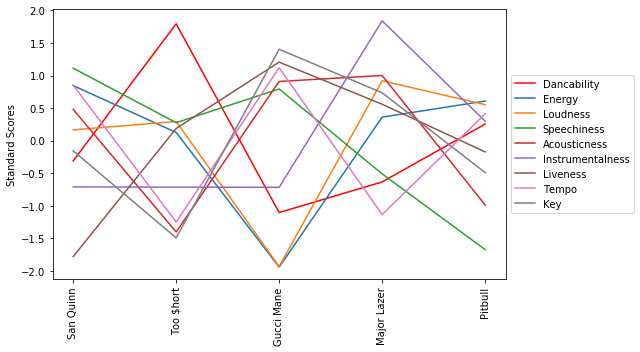

In [73]:
x = ['San Quinn','Too $hort','Gucci Mane', 'Major Lazer', 'Pitbull']
plt.figure(figsize=[9,5])
plt.plot(x, dancability_stand, 'r')  
plt.plot(x, energy_stand) 
plt.plot(x, loudness_stand)
plt.plot(x, speechiness_stand)
plt.plot(x, acousticness_stand)
plt.plot(x, instrumentalness_stand)
plt.plot(x, liveness_stand)
plt.plot(x, tempo_stand)
plt.plot(x, key_stand)
plt.xticks(x, rotation = 'vertical')
plt.ylabel('Standard Scores')
plt.legend(['Dancability', 'Energy','Loudness','Speechiness','Acousticness','Instrumentalness','Liveness','Tempo','Key'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('AudioFeatures.png')
plt.show()

To have been able to identify whether the 5 selected artists have any audio features that are make these artists stand out from the crowd, the average values for each feature should have been calculated. Optionally, could a assortativity analysis have been made by finding the assortativity coefficients for each node. However, these things would have required that the audio feautures should have been found for all 7000 nodes and for 5 songs for each. This was quickly realized as being too heavy to calculate.

Since we are comparing the 5 artists among eachother, each of the features have been converted to standard scores. This also means that a high or low standard score don't necessarily mean that the actual feature values are significantly high or low, just the lowest of the compared artist. This is for instance seen from the accousticness which is quite high for Gucci Mane and Major Lazer, both artists that are not particularly recognized for making accoustic music.

However, when looking at a feature like speechiness, it can clearly be seen that the first three artists in the plot is recognized as rappers while the latter two artist are scoring higher in instrumentalness in sync with the electronic music that these are known for. 